In [18]:

import warnings
warnings.filterwarnings("ignore")

In [19]:
from environments.live_environments import BaseLiveTradingEnv
from neuralforecast.core import NeuralForecast
from Keys import *
import pickle
import numpy as np
from utils import pearl_utils,utils,discord_utils
from Pearl.pearl.utils.instantiations.environments.gym_environment import \
    GymEnvironment
import boto3
from discord import SyncWebhook
from utils import discord_utils
import requests
import matplotlib.pyplot as plt
import pandas as pd
from utils.pandas_reward_functions import log_reward_function,diff_reward_function

In [20]:
channel_url='https://discord.com/api/webhooks/986694946381783102/FOA7nG9ShDcXY95-c3XEKV-Fdek66L9xfbQoKuEuFQkK2P4aFWaZ_fKmzw00j8Oj8Woj'
message='Testing'

In [21]:
from configs import fx_defaults as defaults


In [22]:
forecast_model=NeuralForecast.load(defaults.forecasting_model_path)
# forecast_model=NeuralForecast.load('MultiHeadForecastingModel/')

Seed set to 12
Seed set to 5


In [23]:
forecast_model.scalers_

{'y': <coreforecast.scalers.LocalRobustScaler at 0x30b248dc0>,
 'feature_hour_of_day': <coreforecast.scalers.LocalRobustScaler at 0x328e64f40>,
 'feature_day_of_week': <coreforecast.scalers.LocalRobustScaler at 0x328e67670>,
 'feature_day_of_month': <coreforecast.scalers.LocalRobustScaler at 0x328e654b0>,
 'feature_day_of_year': <coreforecast.scalers.LocalRobustScaler at 0x328e65a80>,
 'feature_BBANDS_BB_UPPER': <coreforecast.scalers.LocalRobustScaler at 0x328e65450>,
 'feature_BBANDS_BB_MIDDLE': <coreforecast.scalers.LocalRobustScaler at 0x328e65630>,
 'feature_BBANDS_BB_LOWER': <coreforecast.scalers.LocalRobustScaler at 0x328e64790>,
 'feature_MACD_MACD': <coreforecast.scalers.LocalRobustScaler at 0x328e660e0>,
 'feature_MACD_SIGNAL': <coreforecast.scalers.LocalRobustScaler at 0x328e66350>,
 'feature_14_period_RSI': <coreforecast.scalers.LocalRobustScaler at 0x328e65180>,
 'feature_14_period_STOCH_%K': <coreforecast.scalers.LocalRobustScaler at 0x328e67a30>}

In [24]:
base_asset=defaults.base_asset
quote_asset=defaults.quote_asset   
test_net=True
time_frame=defaults.time_frame
product_type=defaults.product_type
exchange=defaults.exchange
trade_target=defaults.target_pair
trade_target

'USDJPY'

In [25]:
live_env=BaseLiveTradingEnv(
            api_key=oanda_api_key,
            account_id=oanda_account_id,
            paper=test_net,
            symbol=trade_target,
            time_frame=time_frame,
            product_type=product_type,
            positions=[-1,1],
            history_path='Trade_history/trade.db',
            exchange=exchange,
            forecast_model=forecast_model,
            reward_function=diff_reward_function,
            
            discord_webhook=discord_forex_webhook

            )

Connected to oanda client
Getting data


100%|██████████| 78/78 [00:00<00:00, 16990.69it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [26]:
data=live_env.get_data()

Getting data


100%|██████████| 78/78 [00:00<00:00, 20924.57it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [27]:
data

,ds,close,symbol,feature_AutoTFT_H0,feature_AutoTFT_H1,feature_AutoTFT_H2,feature_AutoTFT_H3,feature_AutoTFT_H4,feature_AutoTFT_H5,feature_AutoNBEATS_H0,...,feature_mean_pred_H0,feature_mean_pred_H1,feature_mean_pred_H2,feature_mean_pred_H3,feature_mean_pred_H4,feature_mean_pred_H5,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year
0,2024-11-25 12:00:00,154.139,USDJPY,154.35939,154.390121,154.40358,154.403046,154.402817,154.402802,154.160568,...,154.259979,153.908401,153.793823,153.665878,153.470322,153.65094,0.021739,-0.5,0.3,0.40137


In [28]:
plot_df=live_env.prepare_plot_df()

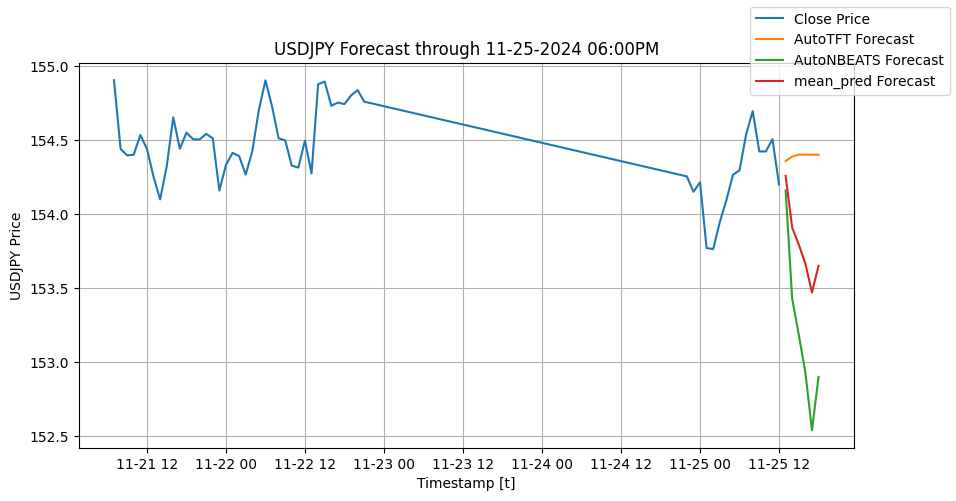

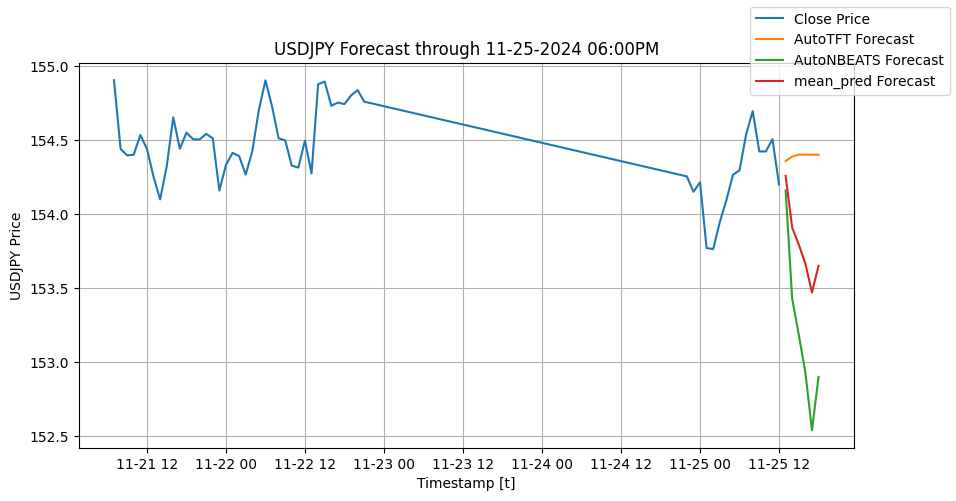

In [29]:
live_env.plot_forecasts(plot_df=live_env.prepare_plot_df(),
                        symb=live_env.symbol)


In [30]:
history=live_env.load_history()
history

""


In [31]:
live_env.client.get_forex_position()

0

In [32]:
p=live_env.client.get_price(live_env.client.symbol)
pos_frame=live_env.client.get_positions(live_env.client.symbol)
# type(p)
pos_frame

Getting data


100%|██████████| 78/78 [00:00<00:00, 17678.36it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

0
Getting data


100%|██████████| 78/78 [00:00<00:00, 23992.06it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

'USDJPY'
'USDJPY'
{'Current_position': 0, 'Trade_from': 0, 'New_position': -1, 'Trade_to': -1, 'Change_size': -1.0, 'Change_direction': -1, 'Place_order': 'SELL', 'Change needed to get to target': 1.0, 'Size in dollars': 9996.5124, 'Size in asset': 64.85303974932042}
Sell


,averagePrice,dividendAdjustment,financing,guaranteedExecutionFees,pl,resettablePL,side,tradeIDs,balance,unrealizedPL
symbol,,,,,,,,,,
USD_JPY,154.136,0.0000,-0.3041,0.0000,-3.1632,-3.1632,sell,[94],-64,-0.0050


'USDJPY'
'USDJPY'
'portfolio_valuation'
Getting data


100%|██████████| 78/78 [00:00<00:00, 17820.88it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

(array([ 2.3657008e-01,  2.3661718e-01,  2.3663780e-01,  2.3663698e-01,
         2.3663664e-01,  2.3663661e-01,  2.3626536e-01,  2.3514061e-01,
         2.3476876e-01,  2.3437743e-01,  2.3377836e-01,  2.3433201e-01,
         2.3641773e-01,  2.3587890e-01,  2.3570329e-01,  2.3550721e-01,
         2.3520750e-01,  2.3548432e-01,  3.3317232e-05, -7.6629635e-04,
         4.5977783e-04,  6.1513652e-04,  1.5325927e-03,  1.5325927e-03],
       dtype=float32),
 0,
 False,
 False,
 {'Current_position': 0,
  'Trade_from': 0,
  'New_position': -1,
  'Trade_to': -1,
  'Change_size': -1.0,
  'Change_direction': -1,
  'Place_order': 'SELL',
  'Change needed to get to target': 1.0,
  'Size in dollars': 9996.5124,
  'Size in asset': 64.85303974932042,
  'success': True,
  'id': '94',
  'accountID': '101-001-22524644-006',
  'userID': 22524644,
  'batchID': '93',
  'requestID': '61310114052866769',
  'time': '2024-11-25T20:59:49.830448087Z',
  'type': 'ORDER_FILL',
  'orderID': '93',
  'instrument': 'US

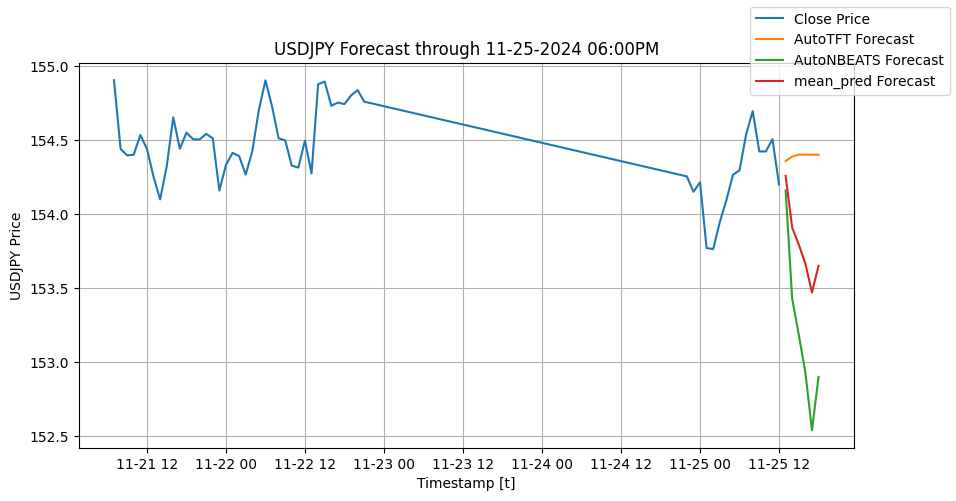

In [33]:
live_env.reset()
live_env.step(0)

In [34]:
live_env.client.symbol

'USDJPY'

In [ ]:
live_env.client._position_frame.loc[live_env.symbol,'balance']


In [ ]:
plot_df=live_env.prepare_plot_df()
plot_df.reset_index(drop=True,inplace=True)

In [ ]:
plot_df

In [ ]:
plot_df.dtypes

In [ ]:
fig,axes=plt.subplots(sharex=True, sharey=True, figsize=(10, 5))
time=pd.Timestamp(plot_df['ds'].values[-1]).strftime('%m-%d-%Y %I:%M%p')

axes.plot(plot_df['ds'], plot_df['close'], label='Close Price')
# plot_df['ds'].values[-1]

In [ ]:
live_env.raw_df

In [ ]:
model_name=defaults.model_name
agent_path=f'Agent/pearl_{model_name}_model.pkl'
agent,learning_params=pearl_utils.load_agent_from_study(study_path="sqlite:///pearl_hyper_parameters.sqlite3",
                                        study_name=f'pearl-{model_name}-hp-search',
                                        action_space_dim=2,
                                            observation_space_dim=30,)
agent=pearl_utils.load_agent_weights(agent,weight_path=agent_path)

In [ ]:
from Pearl.pearl.utils.instantiations.environments.gym_environment import \
    GymEnvironment

In [ ]:
live_pearl_env=GymEnvironment(live_env)

In [ ]:
observation,action_space=live_pearl_env.reset()

In [ ]:
agent.observe(observation, action_space)

In [ ]:
action=agent.act(exploit=True)

# action=
action

In [ ]:
live_env.client.account()

In [ ]:
action_result=live_pearl_env.step(int(action))


In [ ]:
len(live_env.client.trade_client.get_fills()['fills'])

In [ ]:
action_result.observation

In [ ]:
df=live_env.df
import pandas as pd

In [ ]:
df['ds_pst']=pd.to_datetime(df['ds'],utc=False)
df[['ds','ds_pst']]

In [ ]:
live_env.client.get_trade_rules()